In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')


import cv2 
from tqdm import tqdm
import tensorflow as tf
import os

Using TensorFlow backend.


In [2]:
'''
import cv2
vidcap = cv2.VideoCapture('detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Train Tom and jerry.mp4')

def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("C:\Users\bhati\Documents\Untitled Folder\detect-emotions-of-your-favorite-toons\frames\train_frames\frame"+str(count)+".jpg", image) # save frame as JPG file
    return hasFrames,image
train_images =[]
IMAGE_SIZE = (150,150)
sec = 1
frameRate = 1 #//it will capture image in each 0.5 second
count=1
success,image = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
'''


'\nimport cv2\nvidcap = cv2.VideoCapture(\'detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Train Tom and jerry.mp4\')\n\ndef getFrame(sec):\n    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)\n    hasFrames,image = vidcap.read()\n    if hasFrames:\n        cv2.imwrite("frame"+str(count)+".jpg", image) # save frame as JPG file\n    return hasFrames,image\ntrain_images =[]\nIMAGE_SIZE = (150,150)\nsec = 1\nframeRate = 1 #//it will capture image in each 0.5 second\ncount=1\nsuccess,image = getFrame(sec)\nwhile success:\n    count = count + 1\n    sec = sec + frameRate\n    sec = round(sec, 2)\n    success = getFrame(sec)\n'

In [3]:
"""
import cv2
vidcap = cv2.VideoCapture('detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Test Tom and jerry.mp4')

def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("C:\Users\bhati\Documents\Untitled Folder\detect-emotions-of-your-favorite-toons\frames\test_frames\test"+str(count)+".jpg", image) # save frame as JPG file
    return hasFrames,image
train_images =[]
IMAGE_SIZE = (150,150)
sec = 1
frameRate = 1 #//it will capture image in each 0.5 second
count=1
success,image = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
    
"""

'\nimport cv2\nvidcap = cv2.VideoCapture(\'detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Test Tom and jerry.mp4\')\n\ndef getFrame(sec):\n    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)\n    hasFrames,image = vidcap.read()\n    if hasFrames:\n        cv2.imwrite("test"+str(count)+".jpg", image) # save frame as JPG file\n    return hasFrames,image\ntrain_images =[]\nIMAGE_SIZE = (150,150)\nsec = 1\nframeRate = 1 #//it will capture image in each 0.5 second\ncount=1\nsuccess,image = getFrame(sec)\nwhile success:\n    count = count + 1\n    sec = sec + frameRate\n    sec = round(sec, 2)\n    success = getFrame(sec)\n    \n'

In [4]:
traindf=pd.read_csv("detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Train.csv")
print(traindf.shape)
testdf=pd.read_csv("detect-emotions-of-your-favorite-toons/96714c94-6-Dataset/Dataset/Test.csv")
print(testdf.shape)

(298, 2)
(186, 1)


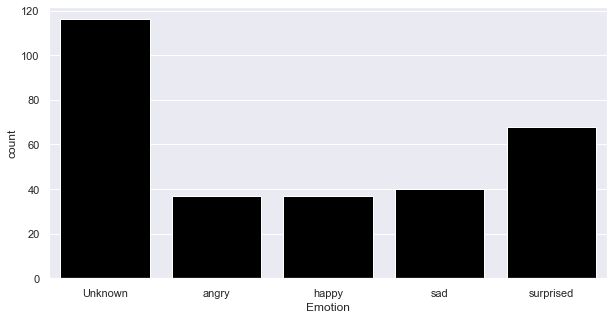

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=traindf,
                   order=list(traindf['Emotion'].value_counts().sort_index().index) ,
                   color='black')

In [6]:
traindf.loc[traindf['Frame_ID'] == 'frame0.jpg']['Emotion']
class_names =np.unique(traindf['Emotion'])
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)

{'Unknown': 0, 'angry': 1, 'happy': 2, 'sad': 3, 'surprised': 4}


In [7]:
IMAGE_SIZE = (150, 150)
dataset = 'detect-emotions-of-your-favorite-toons/frames/train_frames'
output = []
train_images = []
train_labels = []
for files in tqdm(os.listdir(dataset)):
    try:
        label=class_names_label[traindf.loc[traindf['Frame_ID'] == files]['Emotion'].values[0]]
    except:
        #do nothing
        a=1
    img_path=os.path.join(dataset, files)
    # Open and resize the img
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    # Append the image and its corresponding label to the output
    train_images.append(image)
    train_labels.append(label)

100%|████████████████████████████████████████████████████████████████████████████████| 298/298 [00:05<00:00, 57.89it/s]


In [8]:
train_images = np.array(train_images, dtype = 'float32')
train_images = train_images/255
train_labels = np.array(train_labels, dtype = 'int32')   

In [9]:
import cv2
import numpy as np
import os
from os.path import isfile, join
IMAGE_SIZE = (150, 150)
dataset = 'detect-emotions-of-your-favorite-toons/frames/test_frames/'
output = []
test_images = []
files = [f for f in os.listdir(dataset) if isfile(join(dataset, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[4:-4]))
for i in range(len(files)):
    filename=dataset + files[i]
    #reading each files
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    #Append the image and its corresponding label to the output
    test_images.append(image)
test_images = np.array(test_images, dtype = 'float32')
test_images = test_images/255

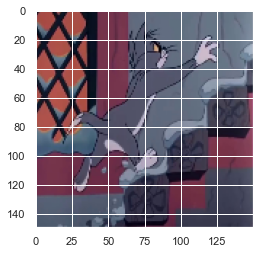

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_images,train_labels,test_size=0.3)
plt.imshow(x_train[20])


In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=(150,150,3))) 
model.add(keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(5, activation="softmax"))


C:\Users\bhati\anaconda3\envs\tfn_gpu\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [13]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6750100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 6,755,405
Trainable params: 6,755,405
Non-trainable params: 0
____________________________________________

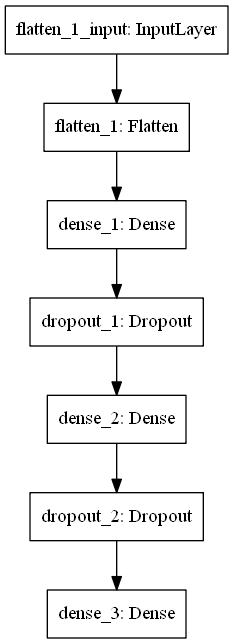

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
#x_val, x_train = x_train[:50], x_train[50:]
#y_val, y_train = y_train[:50], y_train[50:]

In [16]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



In [17]:
#model_history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val))
model_history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
208/208 [==============================] - 1s 3ms/step - loss: 8.9753 - accuracy: 0.2740
Epoch 2/40
208/208 [==============================] - 0s 526us/step - loss: 2.8767 - accuracy: 0.3606
Epoch 3/40
208/208 [==============================] - 0s 676us/step - loss: 2.7550 - accuracy: 0.3413
Epoch 4/40
208/208 [==============================] - 0s 676us/step - loss: 2.1940 - accuracy: 0.3654
Epoch 5/40
208/208 [==============================] - 0s 689us/step - loss: 2.0475 - accuracy: 0.4471
Epoch 6/40
208/208 [==============================] - 0s 602us/step - loss: 2.0621 - accuracy: 0.4038
Epoch 7/40
208/208 [==============================] - 0s 512us/step - loss: 2.2064 - accuracy: 0.3990
Epoch 8/40
208/208 [==============================] - 0s 601us/step - loss: 1.7374 - accuracy: 0.4423
Epoch 9/40
208/208 [==============================] - 0s 601us/step - loss: 1.4443 - accuracy: 0.4663
Epoch 10/40
208/208 [==============================] - 0s 676us/step - loss: 1.4230 

In [18]:
model_history.params

{'batch_size': 32,
 'epochs': 40,
 'steps': None,
 'samples': 208,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}

In [19]:
model_history.history

{'loss': [8.975288024315468,
  2.8767145597017727,
  2.7549747687119703,
  2.194028304173396,
  2.0474732105548563,
  2.062096045567439,
  2.206446354205792,
  1.7373886841994066,
  1.4442745263759906,
  1.422962757257315,
  1.4362383438990667,
  1.6138198375701904,
  1.5332400982196515,
  1.6018451360555797,
  1.5522094323084905,
  1.2618669363168569,
  1.364050058218149,
  1.338477964584644,
  1.2673242092132568,
  1.3687899571198683,
  1.428630572098952,
  1.3163239405705378,
  1.5593886375427246,
  1.3066676992636461,
  1.1985399081156805,
  1.2636564511519213,
  1.2945026617783766,
  1.0240565079909105,
  1.2148091609661396,
  1.2486335772734423,
  1.1395090084809523,
  1.1803822425695567,
  1.1835184280688946,
  1.1539685817865224,
  1.0734754709097056,
  0.9339663019547095,
  1.1329342677043035,
  1.125955031468318,
  1.0880901905206533,
  1.0102081023729765],
 'accuracy': [0.27403846,
  0.36057693,
  0.34134614,
  0.3653846,
  0.4471154,
  0.40384614,
  0.39903846,
  0.44230768

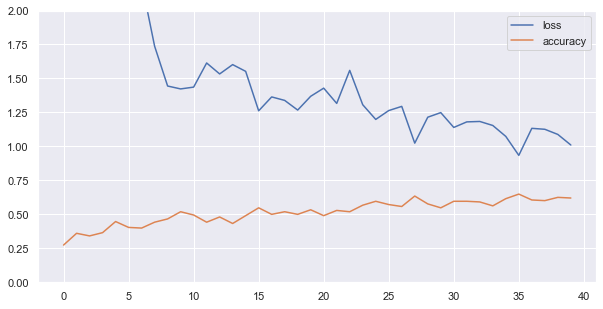

In [20]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [21]:
model.evaluate(x_test, y_test)

90/90 [==============================] - 0s 920us/step


[1.3251588185628256, 0.47777777910232544]

In [22]:
y_proba = model.predict(test_images)
y_proba.round(2)

array([[0.18, 0.05, 0.19, 0.01, 0.57],
       [0.24, 0.04, 0.22, 0.01, 0.48],
       [0.21, 0.07, 0.22, 0.02, 0.48],
       [0.25, 0.1 , 0.17, 0.02, 0.45],
       [0.31, 0.04, 0.22, 0.01, 0.42],
       [0.15, 0.04, 0.24, 0.01, 0.57],
       [0.22, 0.05, 0.2 , 0.01, 0.51],
       [0.3 , 0.04, 0.2 , 0.01, 0.44],
       [0.33, 0.06, 0.19, 0.01, 0.41],
       [0.33, 0.05, 0.19, 0.01, 0.42],
       [0.36, 0.05, 0.18, 0.01, 0.4 ],
       [0.37, 0.05, 0.19, 0.01, 0.39],
       [0.34, 0.05, 0.23, 0.01, 0.37],
       [0.26, 0.06, 0.22, 0.02, 0.45],
       [0.23, 0.04, 0.22, 0.01, 0.5 ],
       [0.22, 0.04, 0.21, 0.01, 0.52],
       [0.38, 0.07, 0.17, 0.02, 0.36],
       [0.24, 0.06, 0.19, 0.02, 0.5 ],
       [0.24, 0.07, 0.18, 0.02, 0.49],
       [0.24, 0.07, 0.19, 0.02, 0.48],
       [0.26, 0.07, 0.19, 0.02, 0.46],
       [0.31, 0.06, 0.2 , 0.02, 0.41],
       [0.32, 0.05, 0.19, 0.02, 0.43],
       [0.26, 0.04, 0.19, 0.01, 0.49],
       [0.43, 0.06, 0.2 , 0.02, 0.29],
       [0.61, 0.04, 0.1 ,

In [23]:
y_pred = model.predict_classes(test_images)
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [24]:
final = np.array(class_names)[y_pred]

AxesImage(54,36;334.8x217.44) Unknown


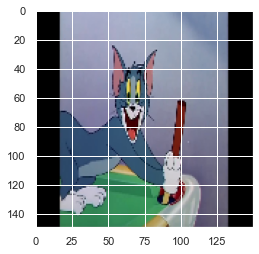

In [25]:
q=172
print(plt.imshow(test_images[q]),final[q])

In [26]:
traindf.head()

,Frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


In [27]:
type(final)

numpy.ndarray

In [28]:
df2 = testdf.assign(Emotion = final) 

In [29]:
df2.head()

,Frame_ID,Emotion
0,test0.jpg,surprised
1,test1.jpg,surprised
2,test2.jpg,surprised
3,test3.jpg,surprised
4,test4.jpg,surprised


In [30]:
df2.to_csv (r'C:\Users\Bhati\Desktop\export_dataframe2.csv', index = False, header=True)